In [ ]:
import pandas as pd
import imblearn
from collections import Counter
data = pd.read_csv('new_dataset_with_label.csv',index_col=0)

In [ ]:
data.iloc[:2339,:-1]

,total_time,compiled,compiled successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,cps,paste_lines,max_pastes,average_test_results,avg_paste
Student,,,,,,,,,,,,,,
A2016\student1013,6894752.0,1441.0,1116.0,689.0,1349.0,38441.0,12365.0,32597.0,2023.0,0.003436,5202.0,120.0,1.957910,4.553441
A2016\student1016,37440.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,8.0,0.000000,NaN,NaN,NaN,NaN
A2016\student1021,9363152.0,2108.0,1278.0,787.0,1605.0,58550.0,19160.0,49003.0,6105.0,0.003997,7270.0,162.0,2.039390,5.147455
A2016\student1029,6949656.0,1775.0,1201.0,852.0,754.0,36461.0,15605.0,30332.0,2683.0,0.005040,7235.0,165.0,0.884977,4.840774
A2016\student1066,2784368.0,338.0,223.0,449.0,810.0,13924.0,6140.0,12169.0,369.0,0.004970,3988.0,139.0,1.804009,3.470160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2016\student9946,2989136.0,311.0,127.0,220.0,335.0,15501.0,12362.0,13196.0,1776.0,0.017313,9610.0,315.0,1.522727,5.385016
B2016\student9949,7787496.0,1961.0,1199.0,588.0,468.0,39601.0,9607.0,30431.0,3452.0,0.002364,3735.0,347.0,0.795918,4.929317
B2016\student9972,12352640.0,5669.0,3568.0,973.0,612.0,55655.0,20719.0,47870.0,3707.0,0.004338,11067.0,232.0,0.628983,4.842414


In [ ]:
data.fillna(0, inplace=True)
data["Label"] =data["Label"].astype("int64")
x = data.iloc[:2339,:-1]
y = data.iloc[:2339,-1]

C:\Users\Keerthana\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Not plagiarised'), Text(1, 0, 'plagiarised')]

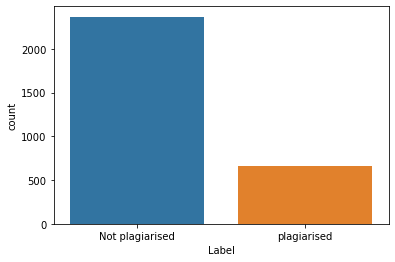

In [ ]:
import seaborn as sns
g = sns.countplot(data['Label'])
g.set_xticklabels(['Not plagiarised','plagiarised'])

In [ ]:
len(x)

2339

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train,Y_train)

In [ ]:
smote_enn = imblearn.combine.SMOTEENN(random_state=0,sampling_strategy='minority')
x_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train,Y_train)
print(sorted(Counter(y_train_resampled).items()))

[(0, 609), (1, 614)]


In [ ]:
x_train_resampled

,total_time,compiled,compiled successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,cps,paste_lines,max_pastes,average_test_results,avg_paste
0,1.120000e+02,0.000000,0.000000,0.000000,0.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.099920e+05,112.000000,48.000000,5.000000,0.000000,3180.000000,851.000000,2843.000000,311.000000,0.001994,396.000000,3.000000,0.000000,2.568182
2,0.000000e+00,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.400000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2.001200e+05,46.000000,43.000000,21.000000,131.000000,394.000000,370.000000,263.000000,16.000000,0.004182,308.000000,59.000000,6.238095,2.717532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,5.673361e+06,1205.823904,916.123945,678.416716,1144.193480,29759.603600,10571.835937,25063.768498,1310.167155,0.002276,4776.599833,91.598997,1.697133,2.702448
1219,3.163886e+06,775.920040,498.800044,365.938981,433.705340,16008.265061,46017.233112,13665.054448,509.237837,0.065563,42451.085450,144.029488,1.139961,3.328610
1220,3.061077e+06,570.313622,357.508838,355.895116,433.644850,19949.235536,7896.165117,16807.783843,1124.826613,0.007200,3320.173493,6352.771208,1.190634,7.622618
1221,6.889983e+06,1834.037516,1255.338233,535.940257,954.296484,36026.601318,25411.759865,30021.507586,5270.381516,0.034037,18993.743282,438.669411,1.761379,9.675806


In [ ]:
y_train_resampled


0       0
1       0
2       0
3       0
4       0
       ..
1218    1
1219    1
1220    1
1221    1
1222    1
Name: Label, Length: 1223, dtype: int64

In [ ]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB(var_smoothing=1e-06)
gnb.fit(x_train_resampled,y_train_resampled)
print(gnb.score(X_test, Y_test))
y_pred = gnb.predict(X_test)

0.6474358974358975


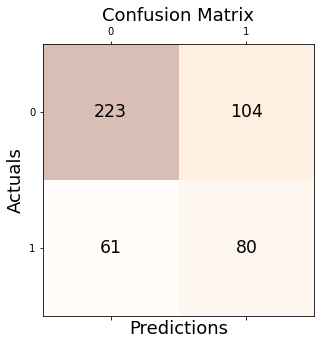

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=gnb.predict(X_test))
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(Y_test, y_pred))

Precision: 0.425


In [ ]:
print('Recall: %.3f' % recall_score(Y_test, y_pred))

Recall: 0.624


In [ ]:
print('Accuracy: %.3f' % accuracy_score(Y_test, y_pred))

Accuracy: 0.632


In [ ]:
print('F1 Score: %.3f' % f1_score(Y_test, y_pred))

F1 Score: 0.506


In [ ]:
from sklearn.naive_bayes import GaussianNB


gnb1 =GaussianNB(var_smoothing=1e-06)
gnb1.fit(x_train_resampled, y_train_resampled)
print(gnb1.score(X_test, Y_test))
y_pred = gnb1.predict(X_test)

0.6474358974358975


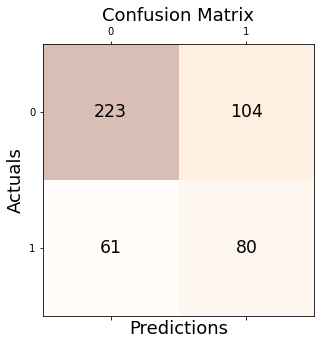

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=gnb1.predict(X_test))
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(Y_test, y_pred))

Precision: 0.435


In [ ]:
print('Recall: %.3f' % recall_score(Y_test, y_pred))

Recall: 0.567


In [ ]:
print('Accuracy: %.3f' % accuracy_score(Y_test, y_pred))

Accuracy: 0.647


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipe = Pipeline(steps=[
                    ('pca', PCA()),
                    ('estimator', GaussianNB()),
                    ])
    
parameters = {'estimator__var_smoothing': [1e-11, 1e-10, 1e-9,1e-8,1e-7,1e-6,1e-5,1e-4]}
Bayes = GridSearchCV(pipe, parameters, scoring='accuracy', cv=10).fit(X_train, Y_train)
print(Bayes.best_estimator_)
print('best score:')
print(Bayes.best_score_)
predictions = Bayes.best_estimator_.predict(X_test)
print(Bayes.best_params_)

Pipeline(steps=[('pca', PCA()), ('estimator', GaussianNB(var_smoothing=1e-06))])
best score:
0.7204687677779043
{'estimator__var_smoothing': 1e-06}
